In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [69]:
df = pd.read_csv( "/content/Time_series_analysis_and_forecast_DATASET.csv") 

In [70]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0, 0.5, 'ElecPrice')

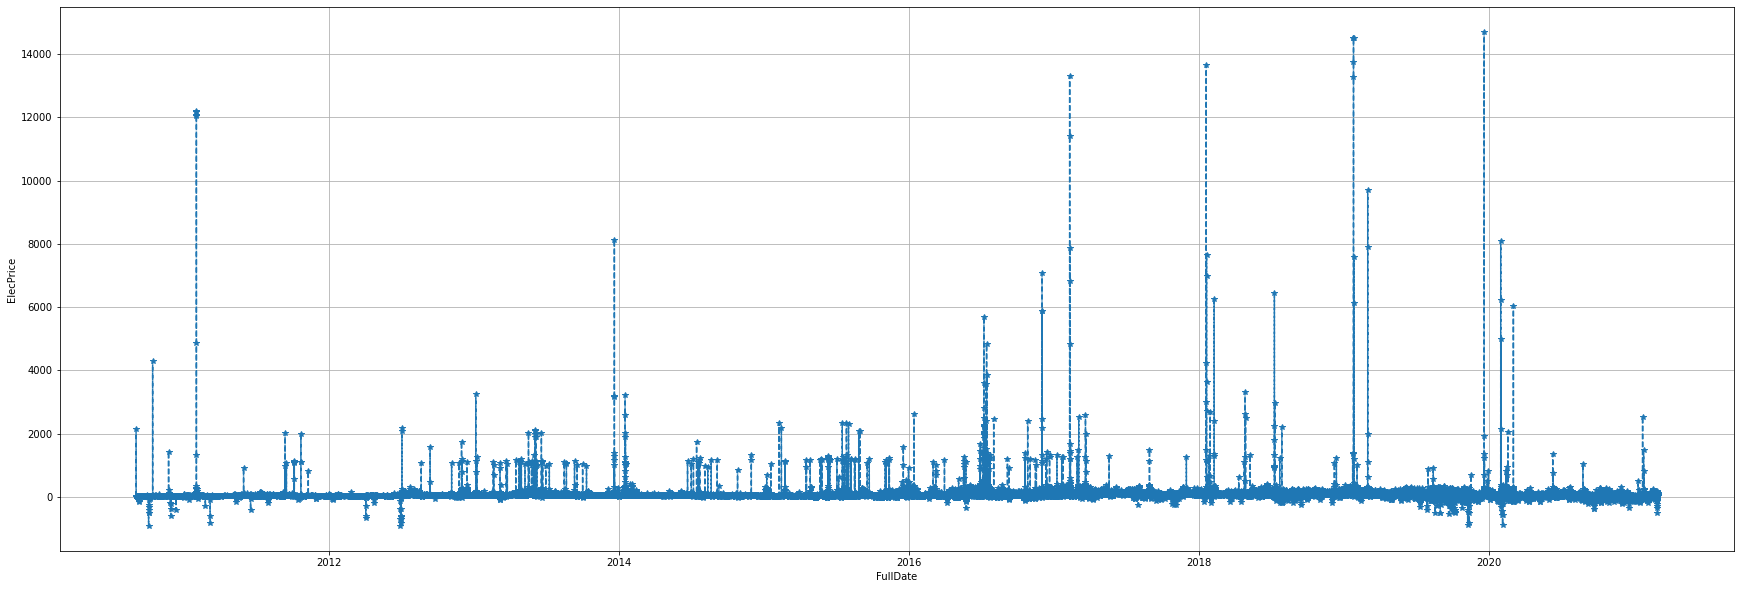

In [71]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) #convert column to datetime
df.set_index( "FullDate" , inplace= True )
plt.figure(figsize=( 30 , 10 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [72]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [56]:
df.isnull().values.any() 

False

In [57]:
df.shape

(92016, 4)

In [58]:
df_copy = df.copy()
rows = df_copy.sample(frac= 0.001 , random_state= 0 )
rows[ 'ElecPrice' ] = np.nan
df_copy.loc[rows.index, 'ElecPrice' ] = rows[ 'ElecPrice' ]

In [59]:
df_copy.isnull().sum()

Tmax          0
SysLoad       0
GasPrice      0
ElecPrice    92
dtype: int64

In [60]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method= 'ffill' )
df_copy_ffill.isnull().sum() 

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [61]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method= 'bfill' )
df_copy_bfill.isnull().sum() 

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [62]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method= 'linear' , limit_direction= 'forward' )
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method= 'linear' , limit_direction= 'backward' )
df_copy_LIB.isnull().sum() 

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Downsampling and Upsampling 


In [63]:
#Downsample to quarterly data points
df_quarterly = df.resample( '3M' ).mean()

In [80]:
#Upsample to daily data points
df_daily = df.resample( 'D' ).mean()


Time Series Specific Exploratory Methods 


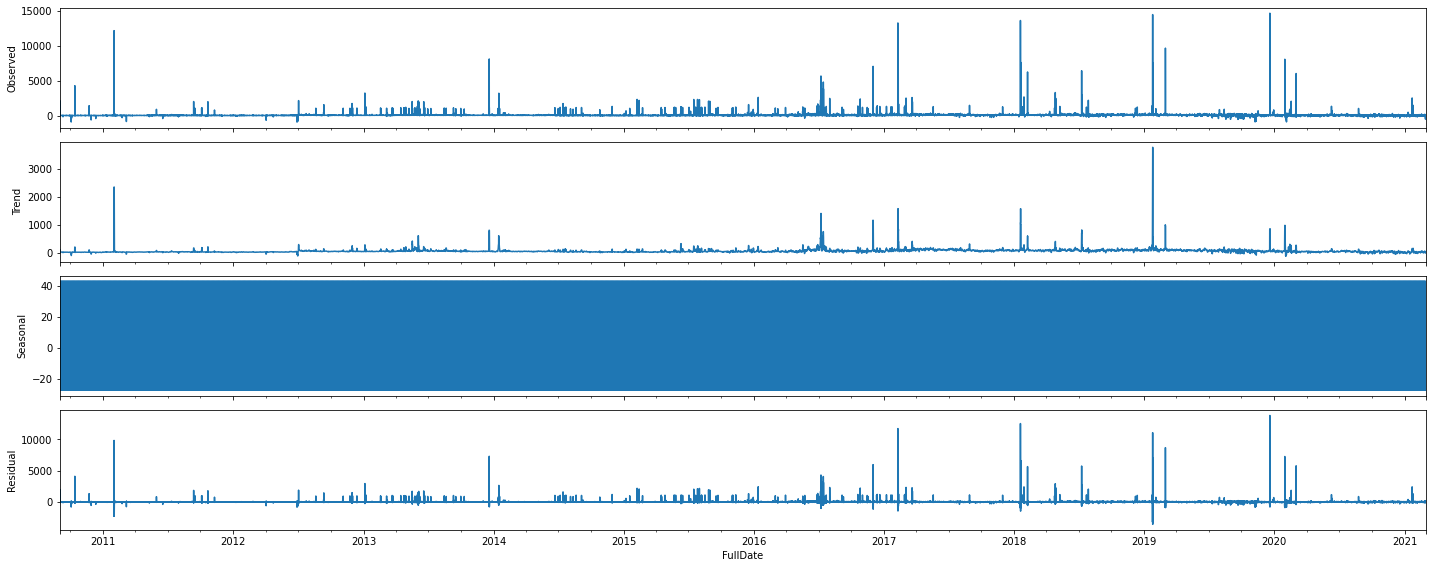

In [81]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 20 , 8
decompose_series = sm.tsa.seasonal_decompose(df[ 'ElecPrice' ], model= 'additive' )
decompose_series.plot()
plt.show() 

In [82]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' ) 

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
 1% : -3.430421110703783 
 5% : -2.8615714297867108 
 10% : -2.56678672898094 


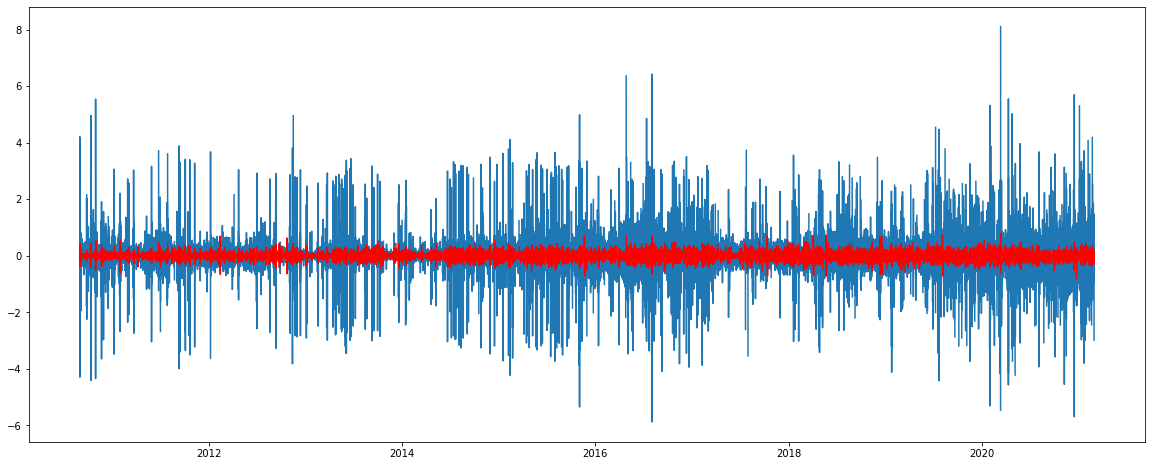

In [83]:
df_log = np.log(df)
df_diff = df_log.diff(periods= 1 )
plt.plot(df_diff.index, df_diff.ElecPrice, '-' )
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red' )

Time Series at Scale

In [84]:
from fbprophet import Prophet
df=pd.read_csv( "/content/Time_series_analysis_and_forecast_DATASET.csv" )
df[ 'FullDate' ]= pd.to_datetime(df[ 'FullDate' ])
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [86]:
df.head() 

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [87]:
df.shape

(92016, 5)

In [88]:
df_train = df.loc[:2756].copy()
df_test = df.loc[2757:].copy()

In [89]:
df_train.shape

(2757, 5)

In [90]:
df_test.shape

(89259, 5)

In [91]:
model = Prophet()
model.fit(df_train) 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
#predict for the rest rows
future = model.make_future_dataframe(periods= 89259)
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

In [ ]:
model.plot(forecast)
plt.show() 

In [ ]:
model.plot_components(forecast)